In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [456]:
df=pd.read_csv("CC GENERAL.csv")

In [457]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [458]:
df.shape

(8950, 18)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [460]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [461]:
missing_values=df.isnull().sum()
missing_values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [462]:
df=df.dropna()

In [463]:
check=df.isnull().sum()
check

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [464]:
duplicates=df.duplicated().sum()
duplicates

np.int64(0)

In [465]:
df = df.drop("CUST_ID", axis=1)

In [466]:
df_copy=df.copy()

In [467]:
skews=df.select_dtypes(include='number').skew()
skews

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

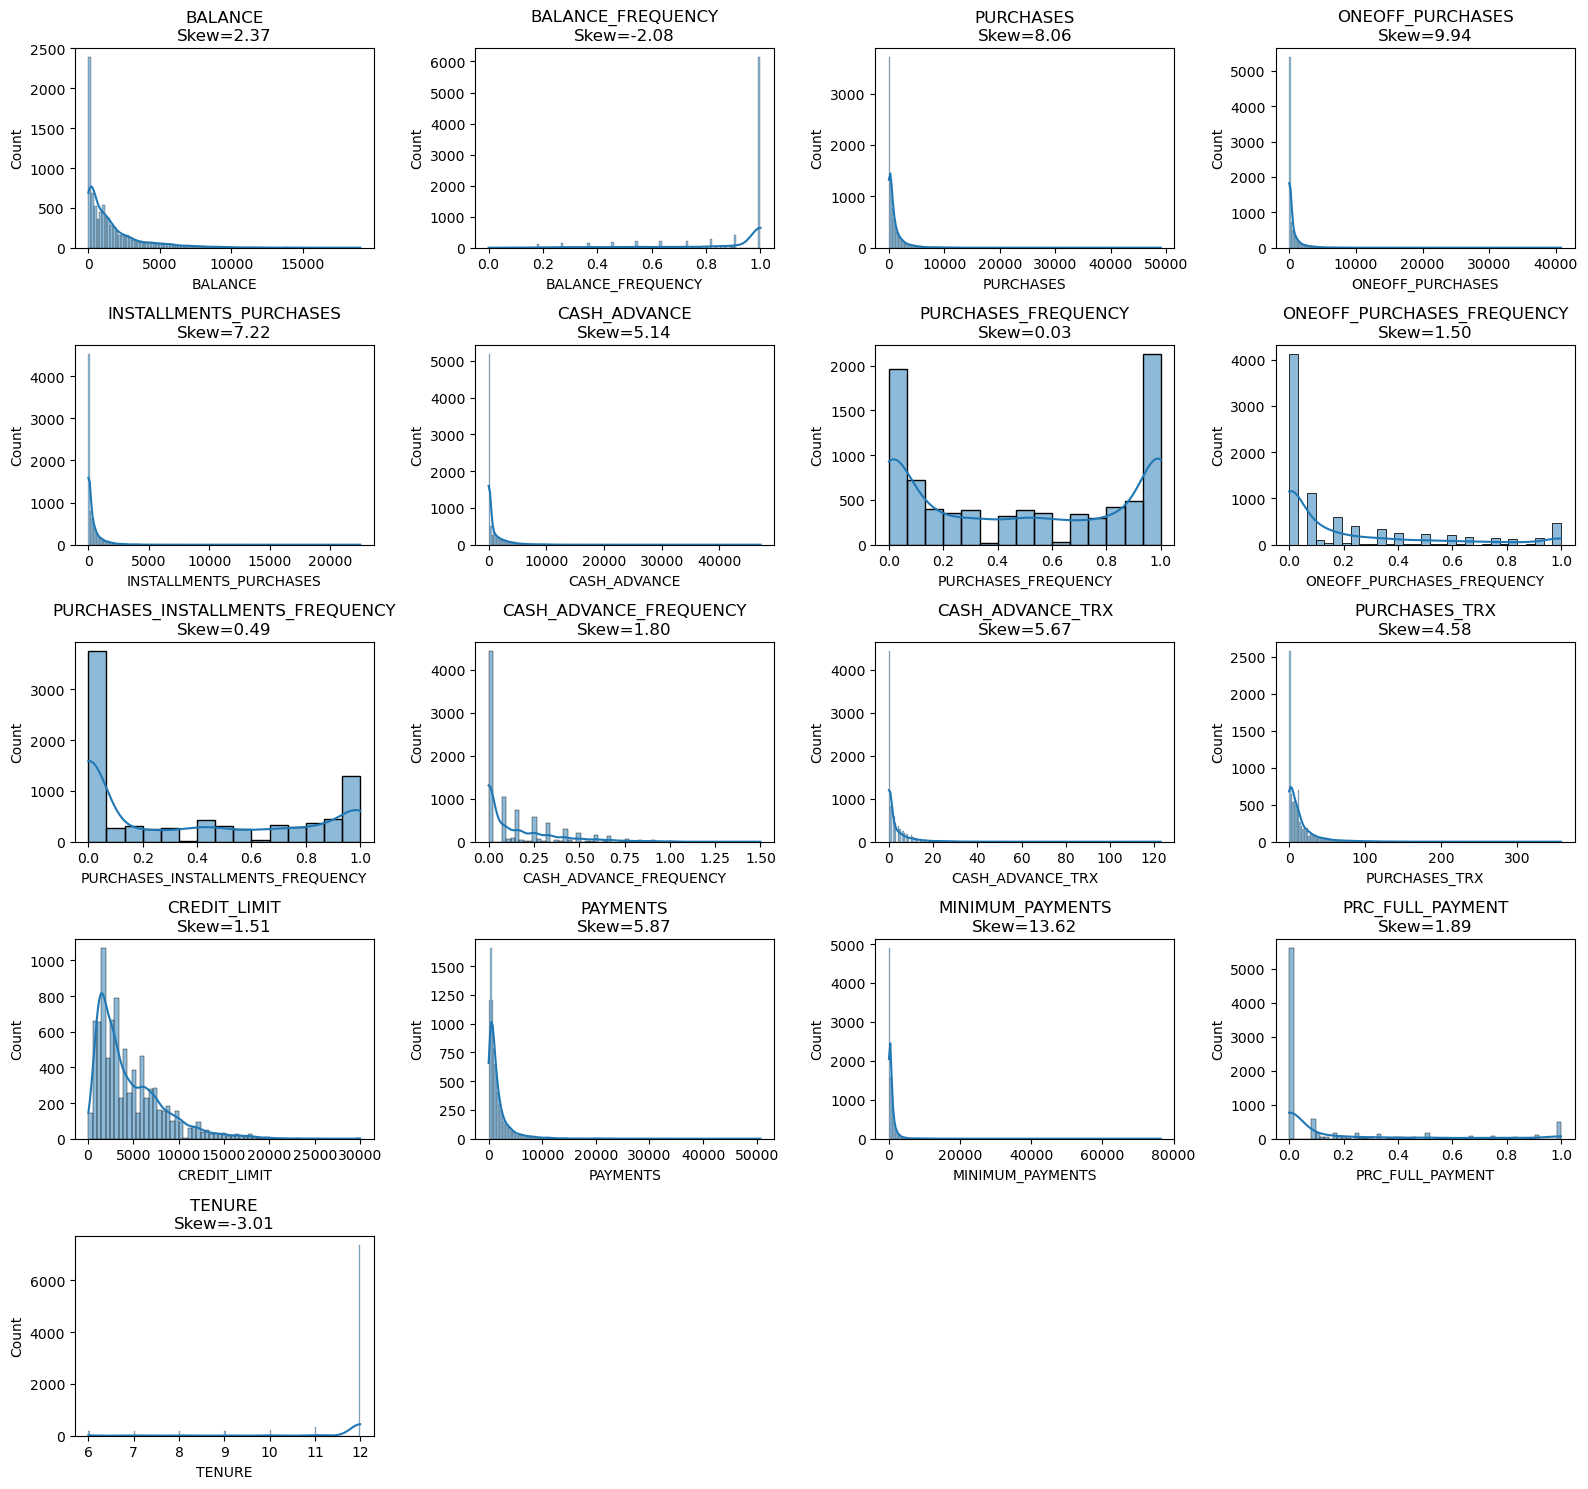

In [468]:
cols_to_plot = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
    'TENURE'
]

cols = 4
rows = (len(cols_to_plot) + cols - 1) // cols  

plt.figure(figsize=(4*cols, 3*rows))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}\nSkew={df[col].skew():.2f}')

plt.tight_layout()
plt.show()


In [469]:
skewed_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

Q1 = df[skewed_cols].quantile(0.25)
Q3 = df[skewed_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[skewed_cols] < (Q1 - 1.5 * IQR)) | (df[skewed_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [470]:
new_skew=df.select_dtypes(include='number').skew()
new_skew

BALANCE                             1.142038
BALANCE_FREQUENCY                  -3.390533
PURCHASES                           1.471543
ONEOFF_PURCHASES                    1.914132
INSTALLMENTS_PURCHASES              1.582207
CASH_ADVANCE                        1.691748
PURCHASES_FREQUENCY                 0.400019
ONEOFF_PURCHASES_FREQUENCY          1.714706
PURCHASES_INSTALLMENTS_FREQUENCY    0.765387
CASH_ADVANCE_FREQUENCY              1.257775
CASH_ADVANCE_TRX                    1.434525
PURCHASES_TRX                       1.362120
CREDIT_LIMIT                        1.455506
PAYMENTS                            1.977930
MINIMUM_PAYMENTS                    1.289248
PRC_FULL_PAYMENT                    2.923765
TENURE                              0.000000
dtype: float64

In [471]:
from sklearn.preprocessing import PowerTransformer


skewed_cols = [
"BALANCE",                             
"BALANCE_FREQUENCY",                  
"PURCHASES",                           
"ONEOFF_PURCHASES",                    
"INSTALLMENTS_PURCHASES",              
"CASH_ADVANCE",                        
"PURCHASES_FREQUENCY",                 
"ONEOFF_PURCHASES_FREQUENCY",         
"PURCHASES_INSTALLMENTS_FREQUENCY",    
"CASH_ADVANCE_FREQUENCY",              
"CASH_ADVANCE_TRX",                    
"PURCHASES_TRX",                       
"CREDIT_LIMIT",                        
"PAYMENTS",                            
"MINIMUM_PAYMENTS",                 
"PRC_FULL_PAYMENT", 
]

pt = PowerTransformer(method='yeo-johnson', standardize=True)

df[skewed_cols] = pt.fit_transform(df[skewed_cols])

new_skew=df.select_dtypes(include='number').skew()
new_skew

BALANCE                            -0.140613
BALANCE_FREQUENCY                  -2.821197
PURCHASES                          -0.304034
ONEOFF_PURCHASES                    0.241590
INSTALLMENTS_PURCHASES              0.084487
CASH_ADVANCE                        0.066131
PURCHASES_FREQUENCY                 0.101819
ONEOFF_PURCHASES_FREQUENCY          0.561000
PURCHASES_INSTALLMENTS_FREQUENCY    0.361703
CASH_ADVANCE_FREQUENCY              0.364795
CASH_ADVANCE_TRX                    0.253370
PURCHASES_TRX                      -0.025197
CREDIT_LIMIT                        0.005558
PAYMENTS                            0.004020
MINIMUM_PAYMENTS                    0.005017
PRC_FULL_PAYMENT                    1.559822
TENURE                              0.000000
dtype: float64

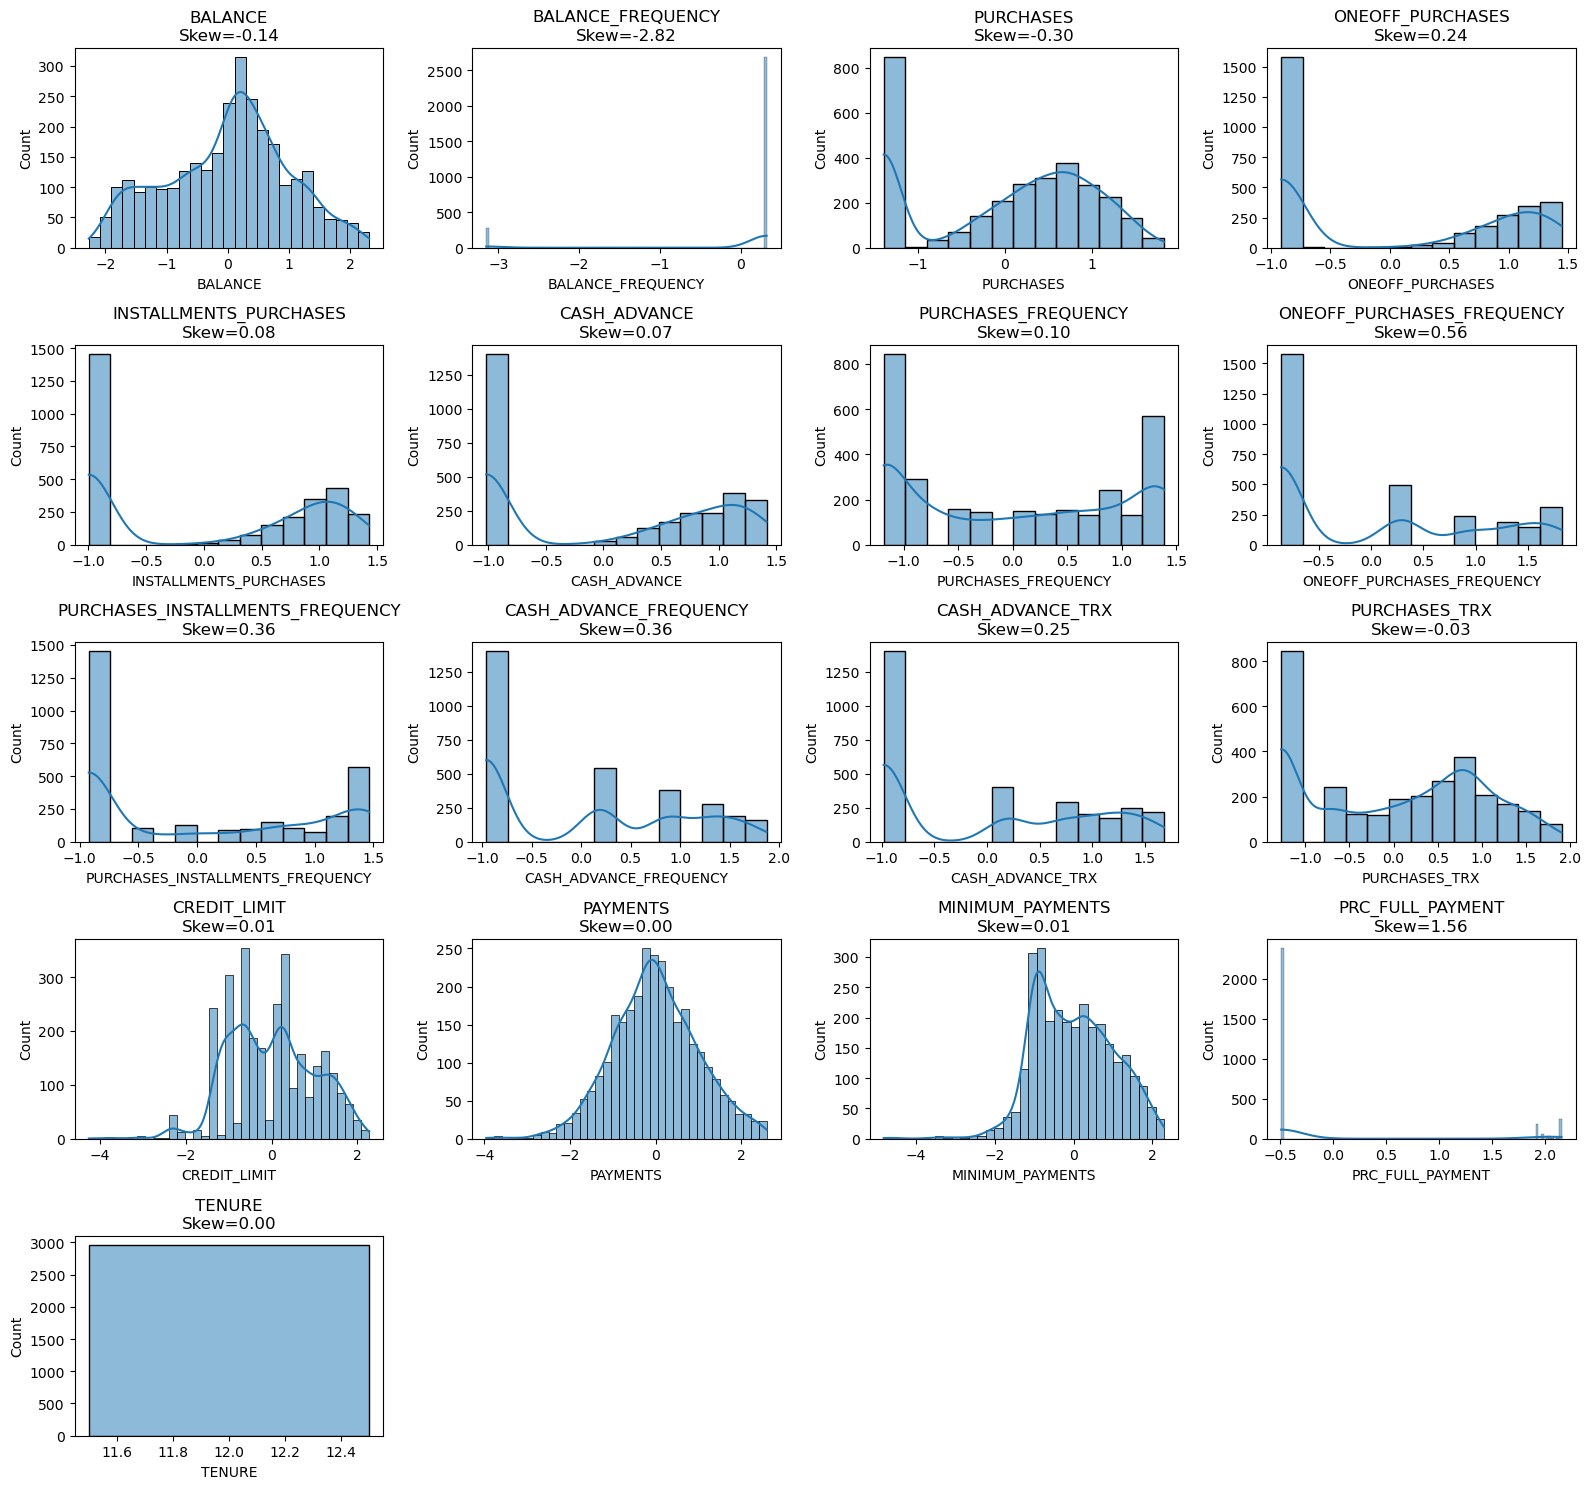

In [472]:
cols_to_plot1 = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
    'TENURE'
]

cols1 = 4
rows = (len(cols_to_plot1) + cols1 - 1) // cols1  

plt.figure(figsize=(4*cols, 3*rows))

for i, col in enumerate(cols_to_plot1, 1):
    plt.subplot(rows, cols1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}\nSkew={df[col].skew():.2f}')

plt.tight_layout()
plt.show()

In [473]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [474]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(df_copy)

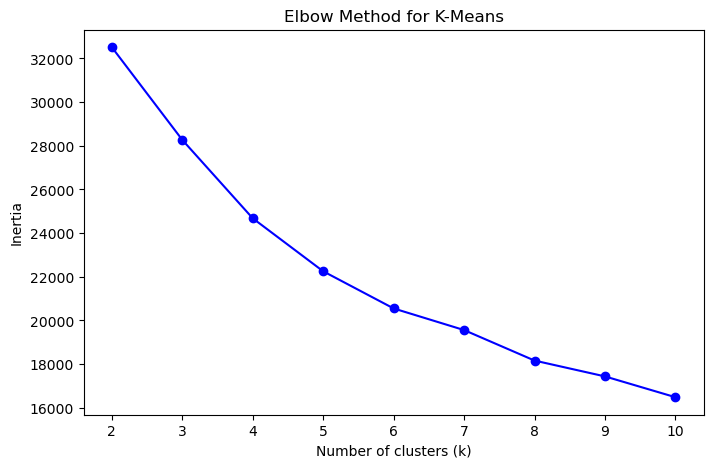

K-Means Silhouette Score: 0.2914555389016476


In [475]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

score = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", score)


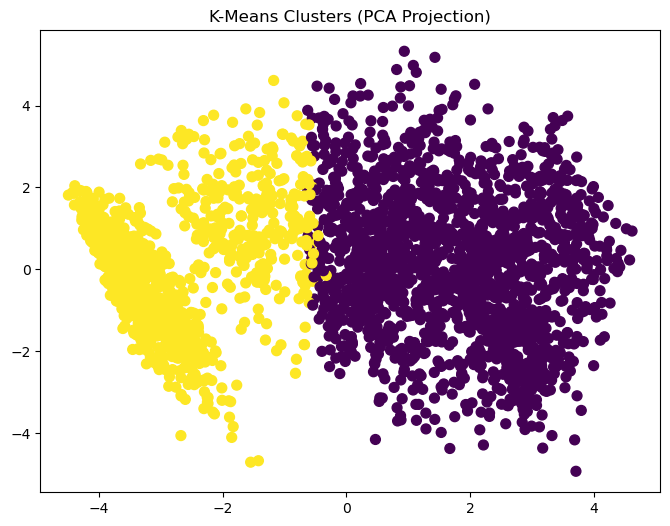

In [476]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.show()

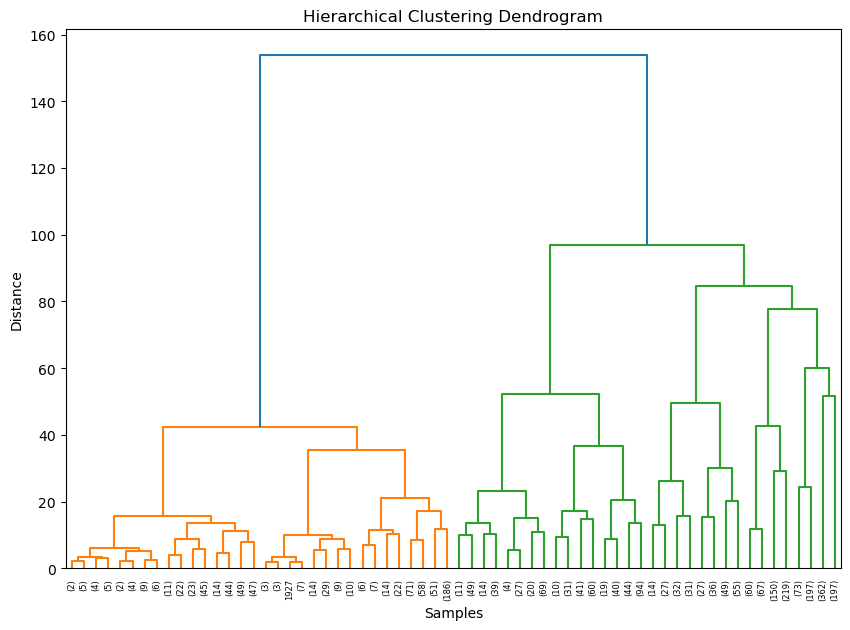

Hierarchical Silhouette Score: 0.2426390663267415


In [477]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

hier_labels = fcluster(linked, t=2, criterion='maxclust')

score_hier = silhouette_score(scaled_data, hier_labels)
print("Hierarchical Silhouette Score:", score_hier)


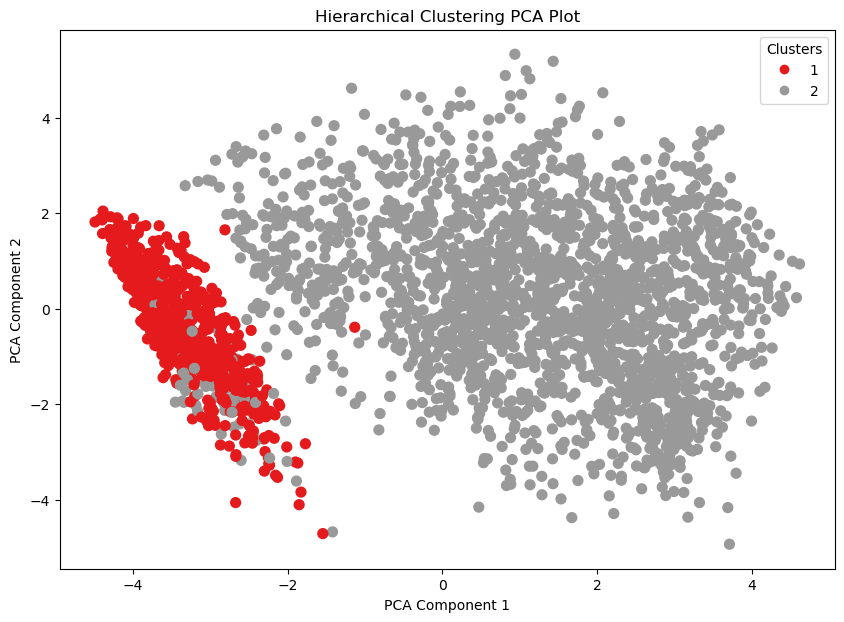

In [478]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hier_labels, cmap='Set1', s=50)
plt.title('Hierarchical Clustering PCA Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

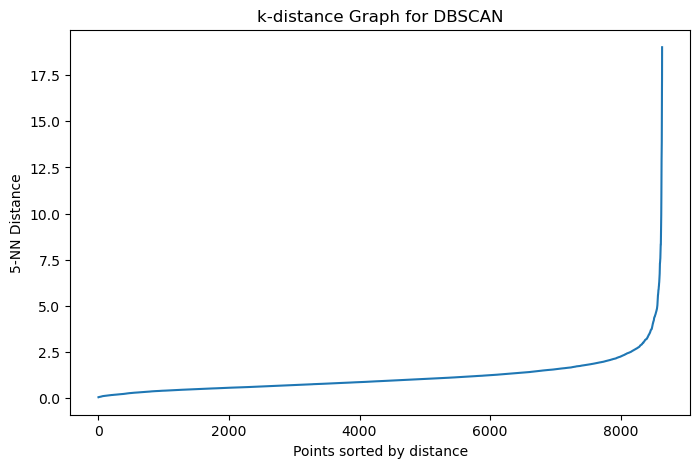

DBSCAN Silhouette Score: 0.4395546371977705
DBSCAN clusters: 2


In [479]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data1)
distances, indices = neighbors_fit.kneighbors(scaled_data1)

distances = np.sort(distances[:, 4]) 
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5-NN Distance')
plt.title('k-distance Graph for DBSCAN')
plt.show()

dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data1)

mask = db_labels != -1
score_db = silhouette_score(scaled_data1[mask], db_labels[mask])
print("DBSCAN Silhouette Score:", score_db)

print("DBSCAN clusters:", len(set(db_labels)) - (1 if -1 in db_labels else 0))


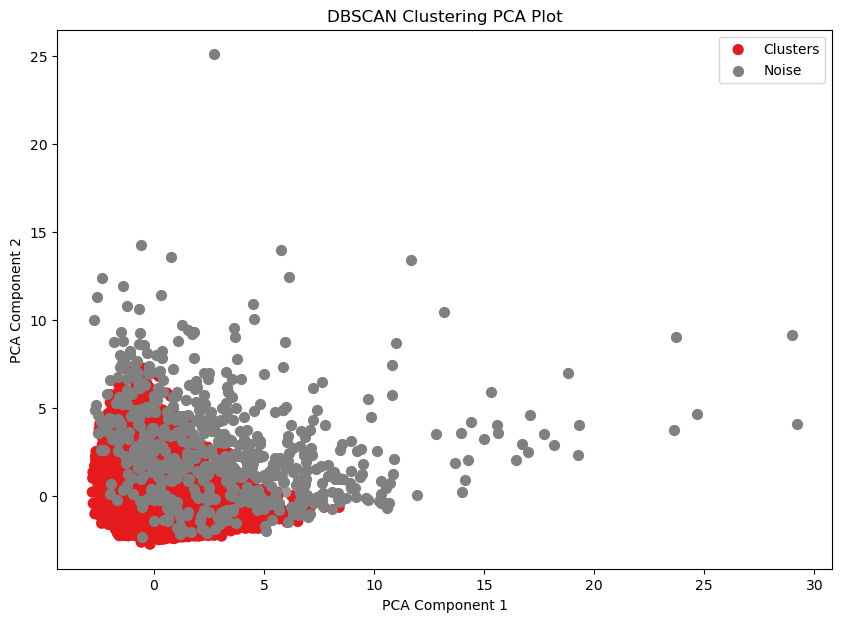

In [480]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data1)
plt.figure(figsize=(10,7))

noise_mask = db_labels == -1
plt.scatter(pca_result[~noise_mask, 0], pca_result[~noise_mask, 1], 
            c=db_labels[~noise_mask], cmap='Set1', s=50, label='Clusters')
plt.scatter(pca_result[noise_mask, 0], pca_result[noise_mask, 1], 
            c='grey', s=50, label='Noise')

plt.title('DBSCAN Clustering PCA Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [481]:
import pickle

with open("scaler_kmeans_hier.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

from scipy.cluster.hierarchy import linkage
hier_data = {
    "linkage_matrix": linked,
    "labels": hier_labels
}
with open("hierarchical_model.pkl", "wb") as f:
    pickle.dump(hier_data, f)

with open("scaler_dbscan.pkl", "wb") as f:
    pickle.dump(scaler, f)  

with open("dbscan_model.pkl", "wb") as f:
    pickle.dump(dbscan, f)

print("✅ All models and scalers have been saved successfully!")


✅ All models and scalers have been saved successfully!
